In [57]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math

# Task 1: Implement a function to perform convolution

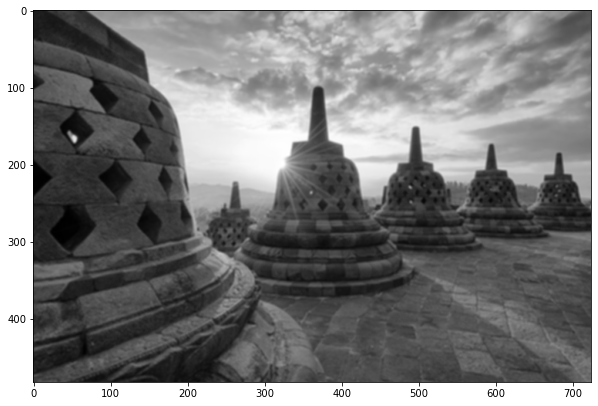

In [58]:

def conv(im, A): #Convolution function
    widthImage = im.shape[0]
    widthKernel = A.shape[0]
    heightImage = im.shape[1]
    heightKernel = A.shape[1]
    resultWidth = widthImage-widthKernel+1
    resultHeight = heightImage-heightKernel+1 #+1 for padding difference
    B = np.zeros([resultWidth,resultHeight])
    for i in range(resultWidth):
        for j in range(resultHeight):
            extract = im[i:i+widthKernel,j:j+heightKernel] #Extract a matrix of the image of the size of the kernel
            B[i,j] = np.sum(np.multiply(extract,A)) #Calculate the sum of the kernel
    return B


im = cv2.imread("borobudur.jpeg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[2, 4, 5, 4, 2],
            [4, 9, 12, 9, 4],
            [5, 12, 15, 12, 5],
            [4, 9, 12, 9, 4],
            [2, 4, 5, 4, 2]])
kernel = kernel * (1/159)
B = conv(im, kernel)
fig = plt.figure(figsize=(10,10))
plt.imshow(B, cmap = 'gray')



# Task 2: Calculate the image gradients


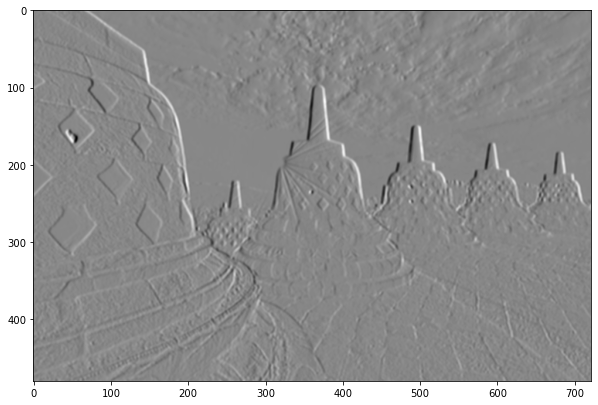

In [59]:
# Show results here

sobelHor = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #Sobel Horizontal matrix
sobelVert = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) #Sobel Vertical matrix
horSob = conv(B, sobelHor) #Using Horizontal sobel kernel
vertSob = conv(B, sobelVert) #Using Vertical sobel kernel
fig = plt.figure(figsize=(10,10))
plt.imshow(horSob, cmap = 'gray') 



# Demonstrate your understanding by answering the question below:
# Looking at the filter coefficients, explain how a sobel filter picks out horizontal edges?
# Looking at how the coefficient is 2 at [1,2] and [3,2] and others being 1, it shows how strongly a horizontal edge is visible.


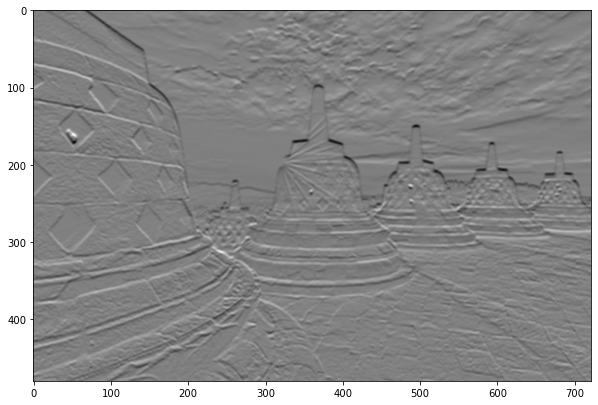

In [60]:
fig = plt.figure(figsize=(10,10)) #Shown separately due to code interference
plt.imshow(vertSob, cmap = 'gray')

# Task 3: Calculate gradient magnitude

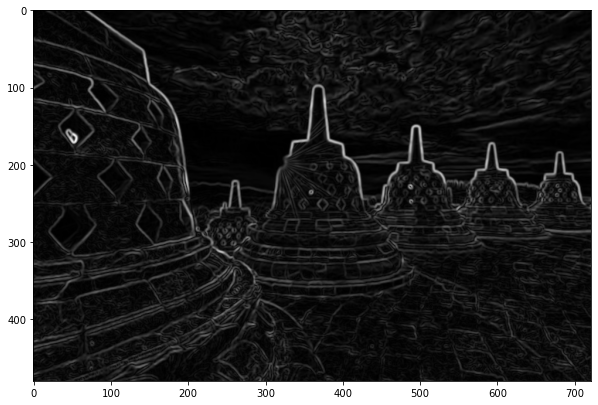

In [61]:
# Show results here
sobelMag = np.sqrt(np.square(horSob) + np.square(vertSob)) #Pythagoras
fig = plt.figure(figsize=(10,10))
plt.imshow(sobelMag, cmap = 'gray')
# Demonstrate your understanding by answering the question below:
# What differences in gradient magnitude would be observed for a corner, edge and solid region?
#For a solid region, the gradient magnitude will be null, for an edge, it is easily recognisable and for a corner, it is partially recognisable.


# Task 4: Calculate gradient orientation

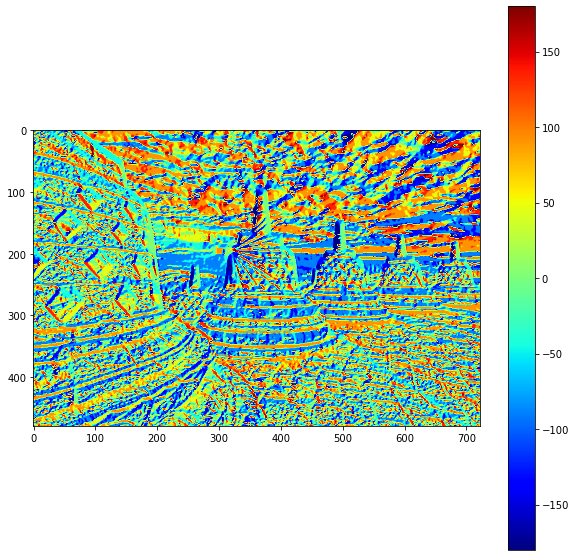

In [62]:
# Show results here
def round45(x):
    return 45 * np.round(x/45)

sobelOr = round45(np.arctan2(vertSob,horSob)*180/np.pi)
fig = plt.figure(figsize=(10,10))
plt.imshow(sobelOr, cmap = 'jet')
plt.colorbar()

# Demonstrate your understanding by answering the question below:
# How could the gradient orientation be used to obtain rotational invariance for patch matching?
# With the gradient orientation, the features will be able to orient to the same direction.


# Task 5: Extend your code to perform non-maximal suppression

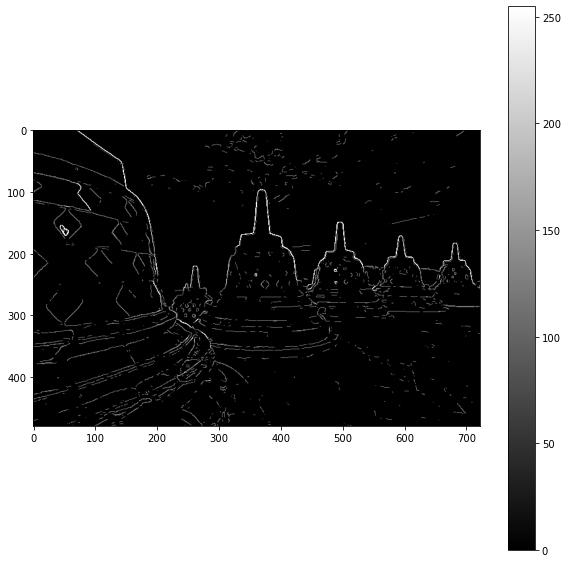

In [63]:
# Explain your code here:
#
#
#

# Show results here
def onPicture(x,y,widthImage,heightImage): #see whether if pixel is out of range
    return x>= 0 and x < widthImage and y >= 0 and y < heightImage

def tileStrength(x,y,im,widthImage,heightImage,direction):
    i, j = x, y
    (dr, dc) = direction

    i += dr #Initialise i and j
    j += dc

    if onPicture(i,j,widthImage,heightImage) and im[i,j] > im[x,y]:
        return True
    else:
        return False

widthImage = sobelMag.shape[0]
heightImage = sobelMag.shape[1]

for i in range(widthImage):
    for j in range(heightImage):
        x = 0
        if (sobelOr[i,j] == 0 or sobelOr[i,j] == -180 or sobelOr[i,j] == 180) and (tileStrength(i,j,sobelMag,widthImage,heightImage,[0,1]) or tileStrength(i,j,sobelMag,widthImage,heightImage,[0,-1])) or (sobelOr[i,j] == -45 or sobelOr[i,j] == 135) and (tileStrength(i,j,sobelMag,widthImage,heightImage,[-1,1]) or tileStrength(i,j,sobelMag,widthImage,heightImage,[1,-1])) or (sobelOr[i,j] == 45 or sobelOr[i,j] == -135) and (tileStrength(i,j,sobelMag,widthImage,heightImage,[1,1]) or tileStrength(i,j,sobelMag,widthImage,heightImage,[-1,-1])) or (sobelOr[i,j] == 90 or sobelOr[i,j] == -90) and (tileStrength(i,j,sobelMag,widthImage,heightImage,[-1,0]) or tileStrength(i,j,sobelMag,widthImage,heightImage,[1,0])):
            sobelMag[i,j] = 0

        #The code above demonstrated thinning. E.g. If the orientation of the pixel is 180 degrees, then the code will check the pixel east and west of it.

        if sobelMag[i,j] < 199 and sobelMag[i,j] >= 89:
            sobelMag[i,j] = 122
        elif sobelMag[i,j] < 89:
            sobelMag[i,j] = 0
        else:
            sobelMag[i,j] = 255
        #The code above demonstrated thresholding which would eliminate pixels with a magnitude below 75 while showing a vague outline for those between .

fig = plt.figure(figsize=(10,10))
plt.imshow(sobelMag, cmap = 'gray')
plt.colorbar()

# Demonstrate your understanding by answering the question below:
# Explain how you chose the threshold for non-maximal suppression?
# My choice of the threshold was mainly guess and check. If there are too many unnecessary lines, I would decrease the threshold. If there are too many incomplete borders, I would increase the threshold.